In [269]:
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook as tqdm
import random
import time
%matplotlib inline

# 実データを扱う場合

In [233]:
# 元データに対しては、以下の処理を行う
# # text形式の元データを読み込む
# network = pd.read_table("soc-Epinions1.txt",header=3)
# # ノードidをユニークする
# node_id = network["ToNodeId"].unique()
# # 入次数を計算する
# in_deg = []
# for i in tqdm(node_id):
#     in_deg.append(sum(network["ToNodeId"]==i))
# # ノード毎の入次数を表にまとめた
# in_deg_df = pd.DataFrame({"ToNodeId":node_id, "in_degree":in_deg})
# in_deg_df = in_deg_df.sort_values("ToNodeId").reset_index(drop=True)
# # 入次数から枝確率を計算する
# in_deg_df["p"] = 1/in_deg_df["in_degree"]
# network_p = pd.merge(network, in_deg_df, on="ToNodeId", how="left").drop(columns="in_degree")

In [234]:
# データの読み込み
# 枝確率を計算済みのネットワークを読み込む
network = pd.read_csv("data.csv")
network[:5]

,# FromNodeId,ToNodeId,p
0,0,4,0.008000
1,0,5,0.005682
2,0,7,0.033333
3,0,8,0.009615
4,0,9,0.066667


In [235]:
# numpy型に変換
network_np = network.values

In [236]:
# 空の有向グラフを作成
G = nx.DiGraph()

In [237]:
# 重み付きの枝を加える
G.add_weighted_edges_from(network_np)

# 練習

In [16]:
G = nx.DiGraph()

In [38]:
weighted_edges = [[0,1,0.1],
                  [0,2,0.2],
                  [1,3,0.3],
                  [1,4,0.4],
                  [2,4,0.5],
                  [2,0,0.6],
                  [3,0,0.7],
                  [3,1,0.8],
                  [4,3,0.9],
                  [4,2,1.0]
                 ]

In [39]:
G.add_weighted_edges_from(weighted_edges)

/Users/fuekimasao/anaconda3/envs/use/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
/Users/fuekimasao/anaconda3/envs/use/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


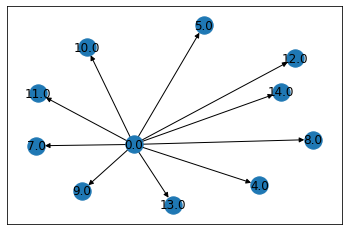

In [162]:
# ネットワークを描画できる
nx.draw_networkx(G)
plt.show()

In [46]:
# ノード
print(nx.nodes(G))

[3, 0, 2, 1, 4]


In [47]:
# ノード数
print(nx.number_of_nodes(G))

5


In [64]:
# グラフのdensity
print(nx.density(G))

0.6


In [71]:
# 各ノードの入次数(ノードid,入次数)
print(G.in_degree())

[(3, 2), (0, 3), (2, 3), (1, 2), (4, 2)]


In [99]:
# 各ノードの出次数(ノードid,出次数)
print(G.out_degree())
# [(3, 3), (0, 3), (2, 2), (1, 2), (4, 2)]

# ノード1の出次数
# out_deg = G.out_degree()
# out_deg[1]
# 2

[(3, 3), (0, 3), (2, 2), (1, 2), (4, 2)]


In [90]:
# 指定されたノードから出る枝を列挙
print(G.out_edges(3))
# [(3, 0), (3, 2), (3, 1)]

print(G.out_edges([3]))
# [(3, 0), (3, 2), (3, 1)]

print(G.out_edges([3,2]))
# [(3, 0), (3, 2), (3, 1), (2, 0), (2, 4)]

[(3, 0), (3, 2), (3, 1)]
[(3, 0), (3, 2), (3, 1)]
[(3, 0), (3, 2), (3, 1), (2, 0), (2, 4)]


In [98]:
# 指定されたノードに入る枝を列挙
print(G.in_edges(3))
# [(1, 3), (4, 3)]

print(G.in_edges([3]))
# [(1, 3), (4, 3)]

print(G.in_edges([3,2]))
# [(1, 3), (4, 3), (3, 2), (0, 2), (4, 2)]

[(1, 3), (4, 3)]
[(1, 3), (4, 3)]
[(1, 3), (4, 3), (3, 2), (0, 2), (4, 2)]


In [104]:
# (0,1)の重みを知りたい場合
print(G[0][1])
# {'weight': 0.1}

{'weight': 0.1}


In [111]:
# ノード3のout-neighbor頂点
print(list(G.successors(3)))
# [0, 2, 1]

[0, 2, 1]


In [114]:
# ノード3のin-neighbor頂点
print(list(G.predecessors(3)))
# [1, 4]

[1, 4]
